# Cancer associated mutations of POLB
The POLB gene is associated with cancer through its involvement in DNA repair processes. Studies indicate that high levels of POLB may destabilize cellular processes in conditions such as uterus and ovary cancer. Additionally, mutations in POLB can enhance the repair ability of cancer cells, allowing them to better withstand DNA-damaging therapies. This highlights the gene's dual role in both normal cellular function and the progression of cancer.

This study aims to develop an accurate risk prediction model for cancer associated with a specific mutation, along with data analysis and visualization.  A machine learning (HML) classification approach was applied to the POLB SNPs dataset, utilizing the Random Forest algorithm combined with Particle Swarm Optimization (PSO) to optimize hyperparameters and extract the best ones. The RFPSO model demonstrated superior performance. Its accuracy was compared to other state-of-the-art classifiers, including Naive Bayes, K Nearest Neighbors, Stochastic Gradient Descent, Linear Discriminant Analysis, Gradient Boosting Machines, AdaBoost, Passive Aggressive, Extra Trees, and Hist Gradient Boosting. The results confirmed the superior classification ability of the RFPSO model in analyzing the relationship between POLB gene variations and cancer onset, providing a strong foundation for further clinical applications and improving cancer diagnosis and treatment.

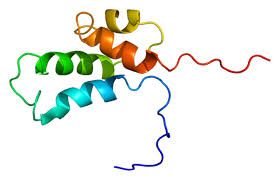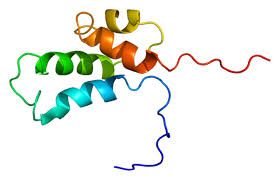

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import __version__ as sklearn_version
import matplotlib
# Print version information
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn_version)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.1.4
Scikit-learn version: 1.5.2
Matplotlib version: 3.7.1
Seaborn version: 0.13.1


In [5]:
# Load and prepare data
data_path = '/content/drive/MyDrive/Datanew_feat_select.csv'
data = pd.read_csv(data_path)
data.head()

,PP,SIFTR,Polyphen2R,Poly1hen2P,PROVEANR,PROVEANP,CADDS,CADDR,CADDP,fathmmS,fathmmR,fathmmP,phyloP,phyloPR,class
0,2,0.72154,0.73220,2,0.59226,1,2.576644,0.42917,22.6,0.47920,0.28091,0,0.022,0.13402,1
1,2,0.72154,0.73220,-1,0.59226,0,2.576644,0.42917,22.6,0.47920,0.28091,0,0.022,0.13402,1
2,4,0.91255,0.90584,2,0.76900,1,4.420825,0.90386,31.0,0.76645,0.37607,1,4.421,0.59598,1
3,4,0.91255,0.90584,-1,0.76900,1,4.420825,0.90386,31.0,0.76645,0.37607,1,4.421,0.59598,1
4,6,0.42199,0.47190,1,0.24244,0,3.459795,0.63060,24.6,0.76750,0.37667,1,4.421,0.59598,1


In [8]:
# Display basic information and the first few rows to understand the structure
data_info = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PP          813 non-null    int64  
 1   SIFTR       813 non-null    float64
 2   Polyphen2R  813 non-null    float64
 3   Poly1hen2P  813 non-null    int64  
 4   PROVEANR    813 non-null    float64
 5   PROVEANP    813 non-null    int64  
 6   CADDS       813 non-null    float64
 7   CADDR       813 non-null    float64
 8   CADDP       813 non-null    float64
 9   fathmmS     813 non-null    float64
 10  fathmmR     813 non-null    float64
 11  fathmmP     813 non-null    int64  
 12  phyloP      813 non-null    float64
 13  phyloPR     813 non-null    float64
 14  class       813 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 95.4 KB


In [7]:
# Display describe data
data.describe()

,PP,SIFTR,Polyphen2R,Poly1hen2P,PROVEANR,PROVEANP,CADDS,CADDR,CADDP,fathmmS,fathmmR,fathmmP,phyloP,phyloPR,class
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,127.364084,0.447824,0.319240,-0.178352,0.472358,0.441574,3.046459,3.173454,21.975296,0.858268,0.603578,0.940959,5.434030,0.652374,0.290283
std,97.873449,0.436105,0.500226,1.124700,0.442395,0.591894,1.741666,7.369695,9.905814,0.215328,0.230489,0.235846,2.955058,0.242143,0.454172
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.429709,0.018050,0.167000,0.000100,0.001510,0.000000,-1.125000,0.033680,0.000000
25%,36.000000,0.230070,0.098540,-1.000000,0.253320,0.000000,2.180435,0.436690,20.700000,0.844920,0.435740,1.000000,3.264000,0.512560,0.000000
50%,117.000000,0.531720,0.340760,-1.000000,0.567870,0.000000,3.085699,0.619850,23.600000,0.938490,0.593690,1.000000,5.844000,0.691490,0.000000
75%,206.000000,0.721540,0.674870,0.000000,0.773080,1.000000,3.978657,0.898840,26.800000,0.983570,0.819580,1.000000,7.853000,0.852570,1.000000
max,335.000000,0.912550,0.905840,2.000000,0.983730,1.000000,10.012748,33.000000,53.000000,0.994540,0.962310,1.000000,9.934000,0.988430,1.000000


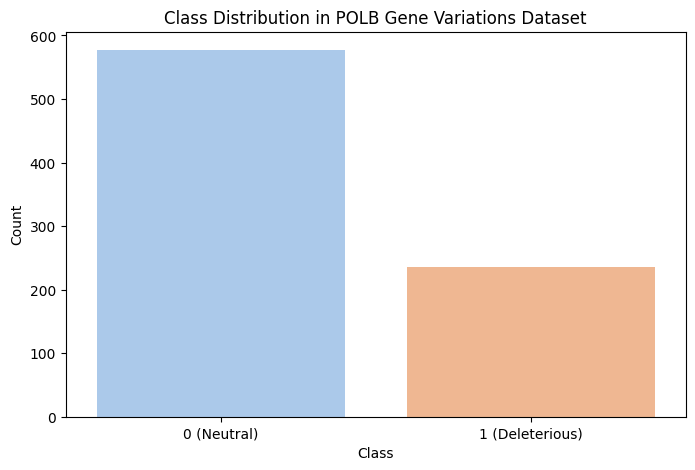

class
0    577
1    236
Name: count, dtype: int64


In [9]:
# Analyzing the distribution of classes in the dataset
class_distribution = data['class'].value_counts()

# Visualizing the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='pastel')
plt.title('Class Distribution in POLB Gene Variations Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0 (Neutral)', '1 (Deleterious)'])
plt.show()



# Displaying the class distribution counts
print(class_distribution)


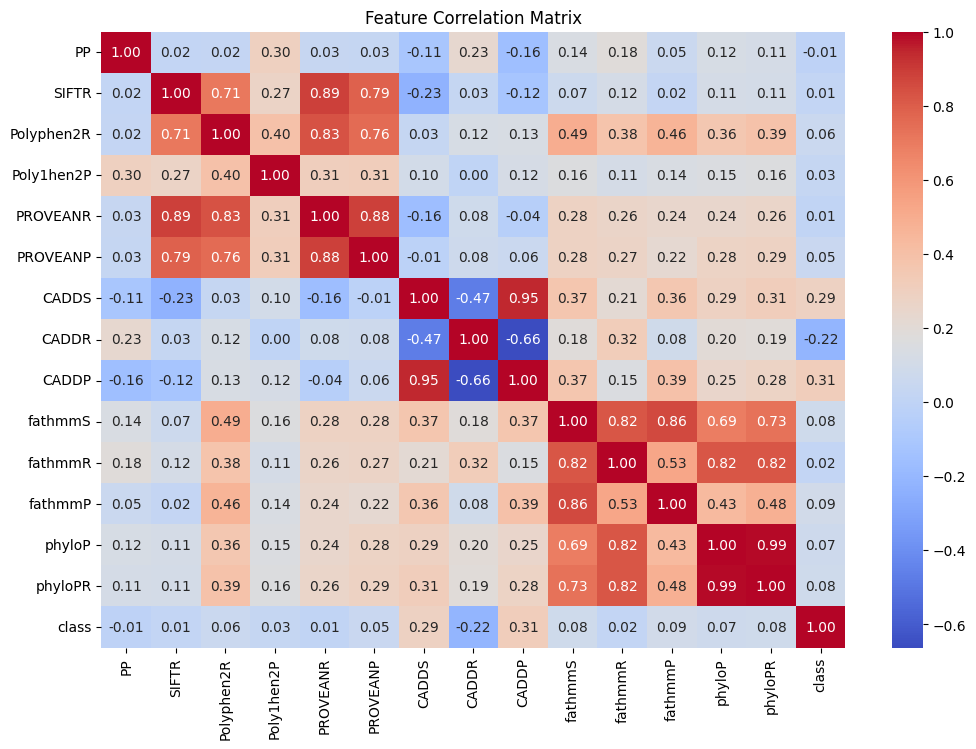

In [10]:
# correlation matrix
correlation_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


The heatmap you shared presents a Feature Correlation Matrix of various features used in your study. Correlations between features range from -1 to 1, where values closer to 1 indicate a strong positive correlation, and values closer to -1 indicate a strong negative correlation.

Key Observations:
CADD features (CADDS, CADDR, CADDP): CADDS and CADDP have a very high positive correlation (0.95), suggesting redundancy. Similarly, CADDS shows a strong negative correlation (-0.47) with CADDR, indicating an inverse relationship.
fathmm features (fathmmS, fathmmR, fathmmP): These features are highly correlated with each other (ranging from 0.53 to 0.86), which may suggest they capture similar information. For instance, fathmmS and fathmmP show a correlation of 0.86.
PROVEANR and Polyphen2R: There is a strong positive correlation (0.83) between these two features, indicating they might behave similarly in the dataset.
phyloP and phyloPR: These features have near-perfect correlation (0.99), which suggests one could potentially be excluded to reduce redundancy.

Feature Distributions: The histograms provide an overview of the distribution of each scaled feature. Most features have relatively normal distributions, though a few exhibit skewness, which may need further investigation if it impacts model performance.

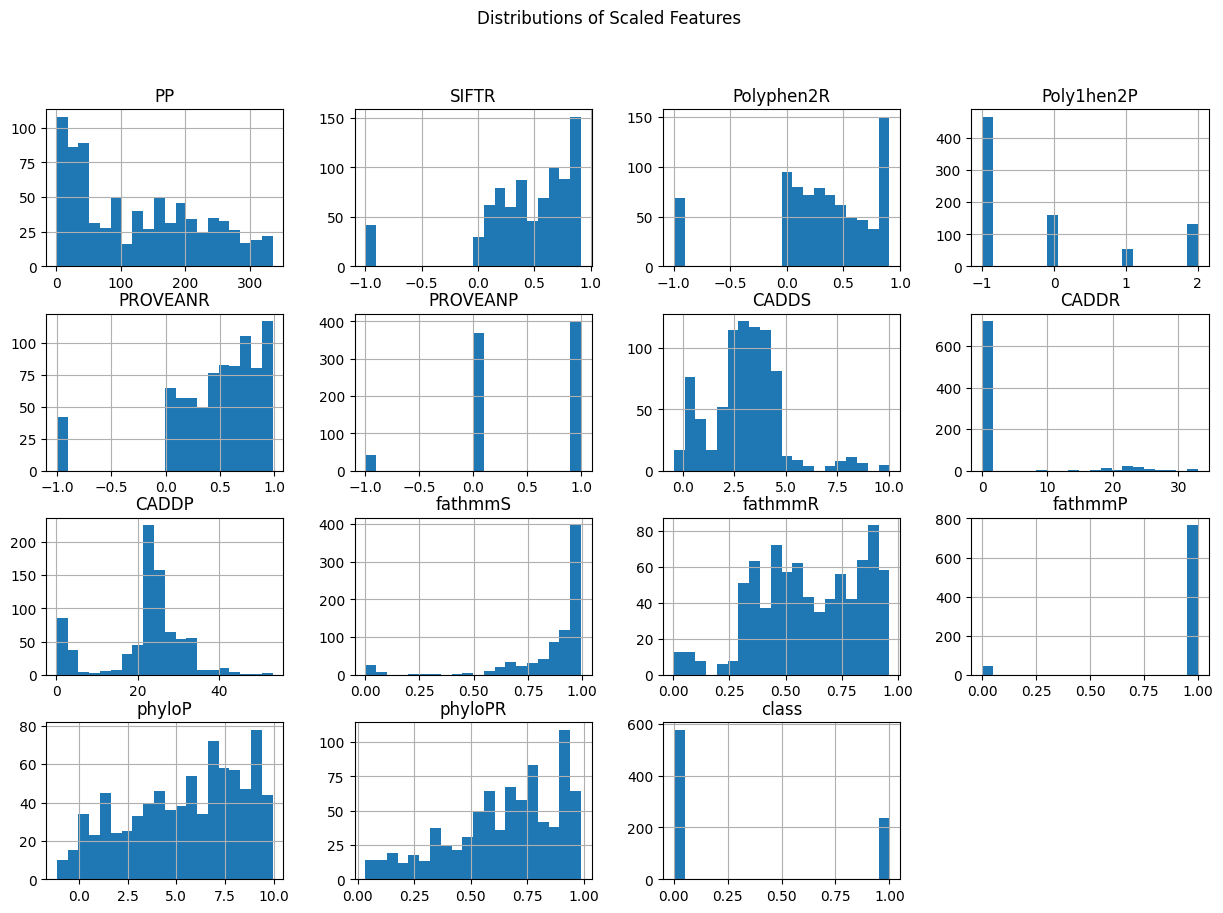

In [11]:
# Plot distributions of scaled features
data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distributions of Scaled Features")
plt.show()

The histograms provide an overview of the distribution of each scaled feature. Most features have relatively normal distributions, though a few exhibit skewness as shown above
The second figure you provided visualizes the distributions of scaled features used in your study. Each histogram shows the frequency distribution of values for a specific feature, which can help in understanding the characteristics of the dataset.

Key Observations from the Distributions:
PP, SIFTR, Polyphen2R, PROVEANP:

Most of these features are skewed towards specific value ranges (e.g., SIFTR, Polyphen2R, and PROVEANP show a clustering of values around 0.5 to 1.0).
PP shows a long tail, with values spread across a wide range, indicating potential outliers or a non-uniform distribution.
CADD features (CADDS, CADDR, CADDP):

CADDS appears to be more normally distributed, whereas CADDR is highly skewed with many instances clustered at specific values (around 0, 1, and 2).
CADDP shows some spread, but with a peak towards certain values, suggesting less variation.
fathmm features (fathmmS, fathmmR, fathmmP):

fathmmS and fathmmR have a skewed distribution, with more values concentrated at the higher end of the scale.
fathmmP shows a significant skew, with many instances around 0 and a few outliers at higher values.
phyloP and phyloPR:

Both features have a distribution spread across their range, with a notable clustering towards the higher end (around 1.0).
Class (target variable):

The target variable class is binary, with the majority of instances having a value of 1 (representing deleterious mutations), and fewer with a value of 0 (representing neutral mutations).

In [14]:
y = data.pop('class')
X = data

In [16]:
# Split data using StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(X, y):
    X_train_strat, X_test_strat = X.iloc[train_index], X.iloc[test_index]
    y_train_strat, y_test_strat = y.iloc[train_index], y.iloc[test_index]

# Save splits
train_data = pd.concat([X_train_strat, y_train_strat], axis=1)
test_data = pd.concat([X_test_strat, y_test_strat], axis=1)
train_data.to_csv('train_data_stratnew_feat_select.csv', index=False)
test_data.to_csv('test_data_stratnew_feat_select.csv', index=False)

# Print data shapes
print(f'Training data shape: {train_data.shape}')
print(f'Testing data shape: {test_data.shape}')



Training data shape: (650, 15)
Testing data shape: (163, 15)


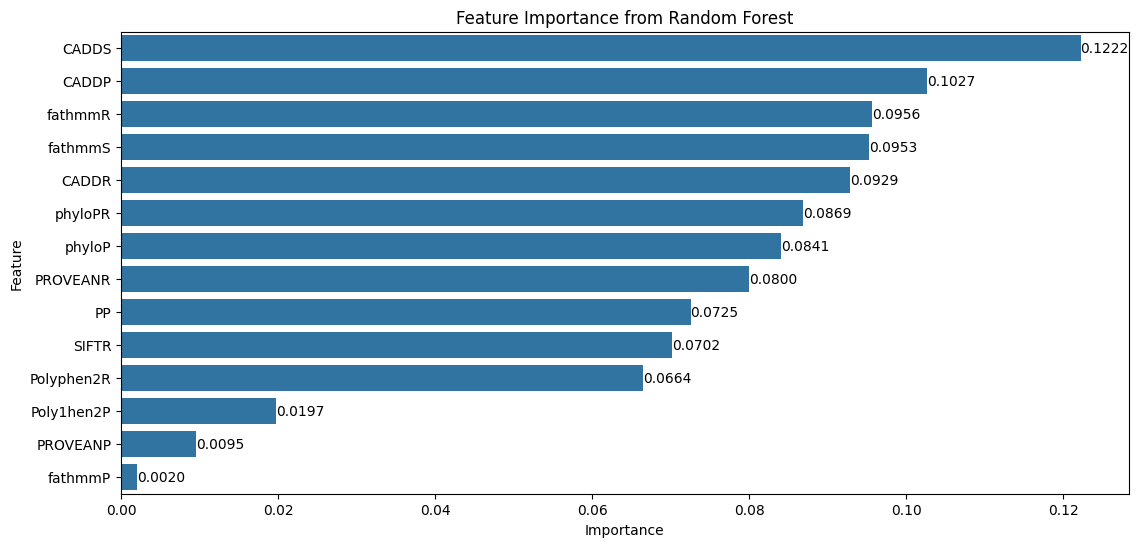

In [24]:
# 3.Feature importance using Random Forest
# Initialize and fit a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_strat, y_train_strat)  # Use X_train_strat and y_train_strat

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X_train_strat.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(13, 6))
ax = sns.barplot(x='Importance', y='Feature', data=importance_df)

# Annotate the bars with the numerical importance values
for index, value in enumerate(importance_df['Importance']):
    ax.text(value, index, f'{value:.4f}', va='center', ha='left')

plt.title('Feature Importance from Random Forest')
plt.show()


## Feature Importance from Random Forest
### Top Features:

1- CADD (CADDS, CADDR, CADDP): These features are the most important according to the Random Forest classifier, contributing the most to the classification task.
2- fathmmR and fathmmS: These are also significant contributors, likely due to their importance in differentiating between the classes.
### Lower Importance Features:

1- fathmmP, PROVEANP: These have relatively low importance in the model, which suggests that they may have less predictive power for the target variable (class).
Insights for Feature Selection:

2- Features like CADDS, CADDR, and CADDP should be prioritized in further modeling tasks, while features with lower importance can potentially be dropped or analyzed further to assess their usefulness.

In [10]:
X

,PP,SIFTR,Polyphen2R,Poly1hen2P,PROVEANR,CADDS,CADDR,CADDP,fathmmS,fathmmR,phyloP,phyloPR
0,2,0.72154,0.73220,2,0.59226,2.576644,0.42917,22.6,0.47920,0.28091,0.022,0.13402
1,2,0.72154,0.73220,-1,0.59226,2.576644,0.42917,22.6,0.47920,0.28091,0.022,0.13402
2,4,0.91255,0.90584,2,0.76900,4.420825,0.90386,31.0,0.76645,0.37607,4.421,0.59598
3,4,0.91255,0.90584,-1,0.76900,4.420825,0.90386,31.0,0.76645,0.37607,4.421,0.59598
4,6,0.42199,0.47190,1,0.24244,3.459795,0.63060,24.6,0.76750,0.37667,4.421,0.59598
...,...,...,...,...,...,...,...,...,...,...,...,...
808,276,0.54683,0.42056,1,0.74582,4.295602,0.88121,29.5,0.94069,0.60019,9.934,0.98843
809,289,0.42487,0.07471,0,0.36189,2.716478,0.45947,22.9,0.72613,0.35536,3.238,0.51051
810,290,0.55530,0.49598,1,0.87380,3.426855,0.62225,24.5,0.92767,0.56496,9.934,0.98843
811,35,0.91255,0.90584,-1,0.92736,4.131894,0.83197,28.0,0.98996,0.89714,9.214,0.94249


Training data shape: (650, 15)
Testing data shape: (163, 15)
Training data class distribution:
  Number of samples in class 0: 461
  Number of samples in class 1: 189
Testing data class distribution:
  Number of samples in class 0: 116
  Number of samples in class 1: 47
Classifier                   | Accuracy | Precision | recall | Specificity | F1 Score
---------------------------------------------------------------------------
Naive Bayes                  | 47.03    | 81.82     | 47.03  | 25.42       | 43.90   
K Nearest Neighbors          | 70.28    | 68.11     | 70.28  | 87.32       | 67.56   
Stochastic Gradient Descent  | 42.65    | 81.17     | 42.65  | 19.26       | 37.50   
Linear Discriminant Analysis | 72.26    | 69.61     | 72.26  | 93.91       | 66.92   
Gradient Boosting Machines   | 80.05    | 80.41     | 80.05  | 94.80       | 77.91   
AdaBoost                     | 70.72    | 70.13     | 70.72  | 83.41       | 69.63   
Passive Aggressive           | 71.04    | 50.96    

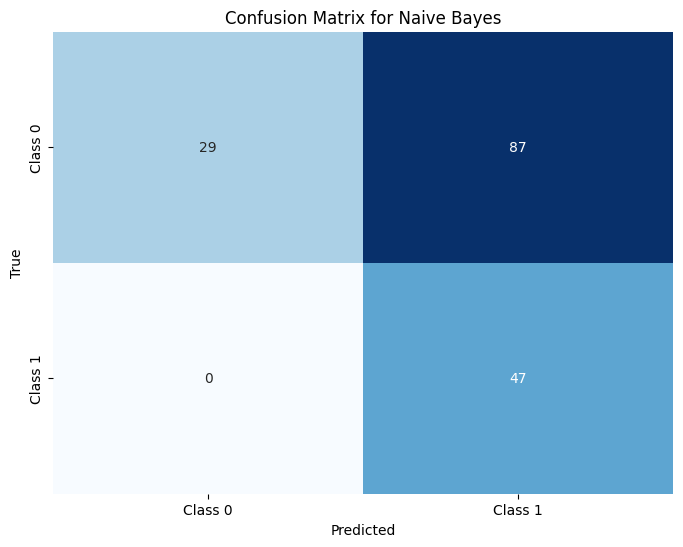

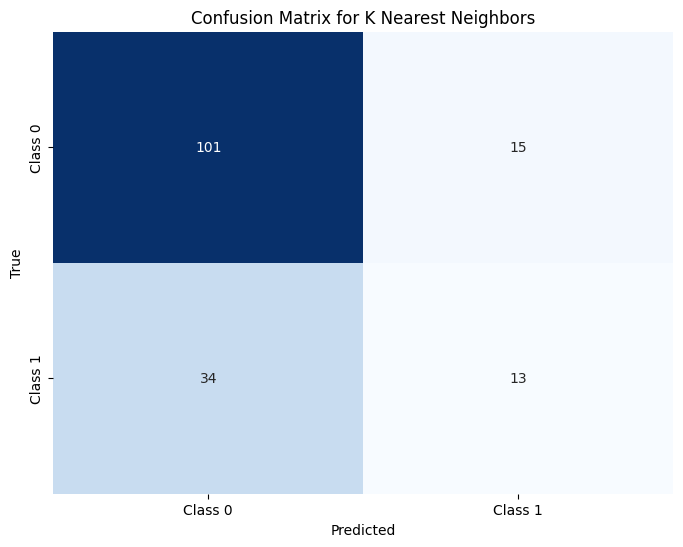

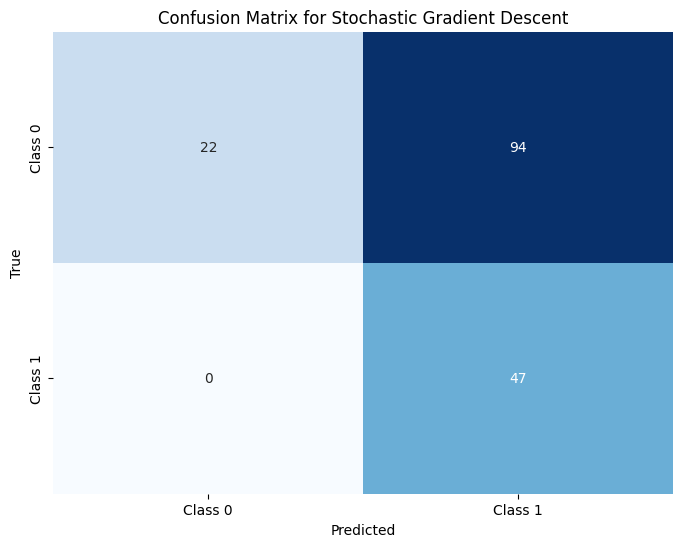

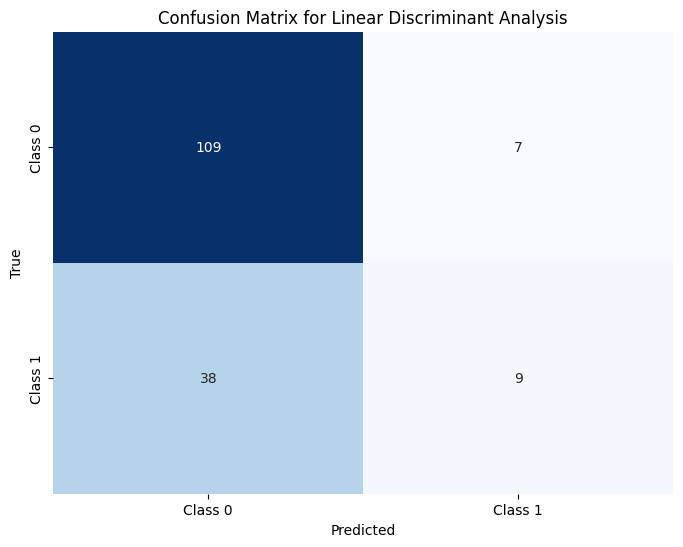

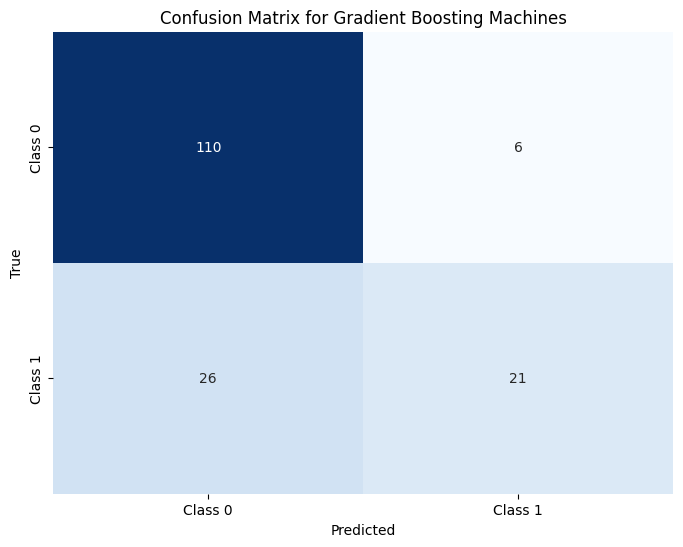

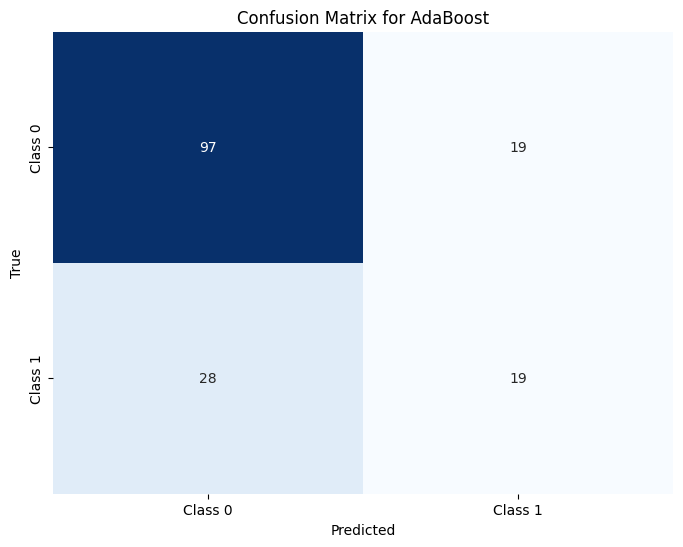

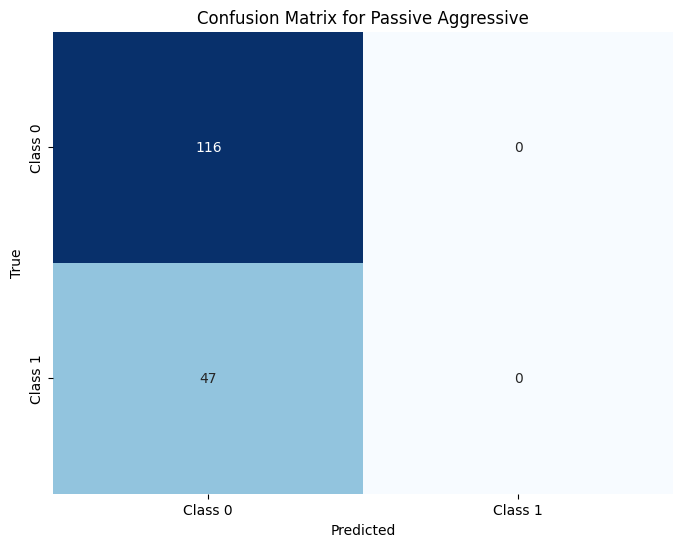

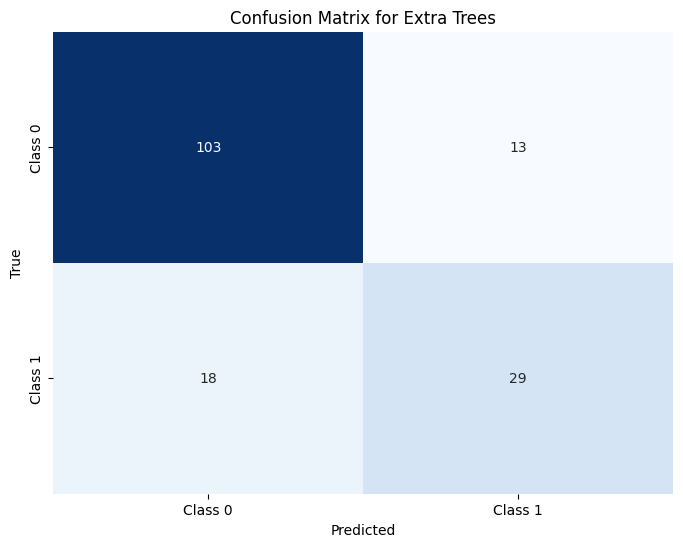

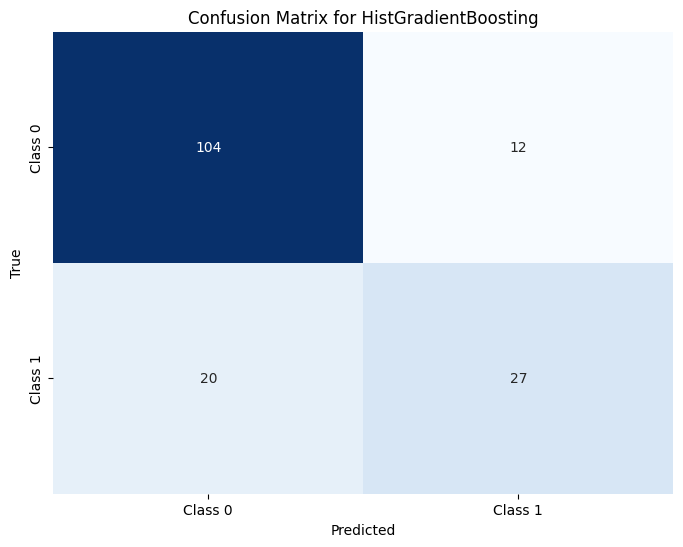

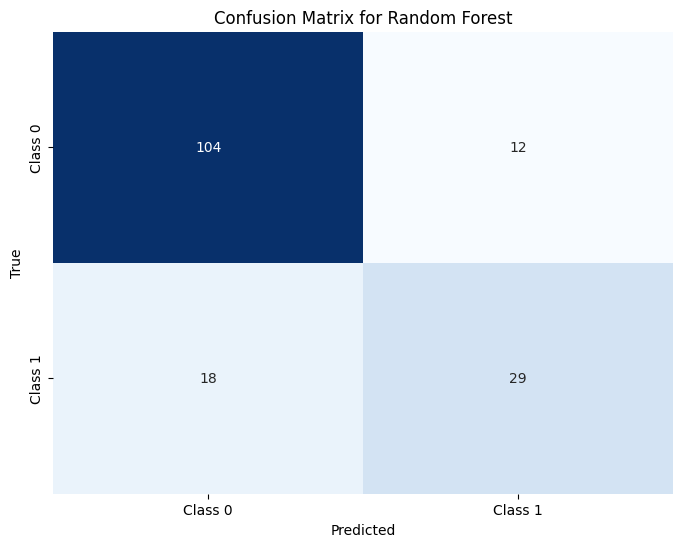

In [18]:
# Print data shapes
print(f'Training data shape: {train_data.shape}')
print(f'Testing data shape: {test_data.shape}')

# Class distribution
for dataset, label in [(train_data, 'Training'), (test_data, 'Testing')]:
    class_counts = dataset['class'].value_counts()
    print(f"{label} data class distribution:")
    for cls, count in class_counts.items():
        print(f"  Number of samples in class {cls}: {count}")

# Initialize classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Stochastic Gradient Descent': SGDClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Gradient Boosting Machines': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Passive Aggressive': PassiveAggressiveClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


# Train classifiers
for name, clf in classifiers.items():
    clf.fit(X_train_strat, y_train_strat)

# Bootstrap sampling and evaluation
n_iterations = 1000
metrics_dict = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'tnr': []} for name in classifiers}

for i in range(n_iterations):
    # Bootstrap sampling
    sample = X_test_strat.copy()
    sample['y'] = y_test_strat.values
    sample = sample.sample(n=40, replace=True)
    X_bs = sample.drop('y', axis=1)
    y_bs = sample['y']

    # Evaluate each classifier
    for name, clf in classifiers.items():
        y_pred = clf.predict(X_bs)
        report = classification_report(y_bs, y_pred, output_dict=True)

        metrics_dict[name]['accuracy'].append(report['accuracy'] * 100)
        metrics_dict[name]['precision'].append(report['weighted avg']['precision'] * 100)
        metrics_dict[name]['recall'].append(report['weighted avg']['recall'] * 100)  # Changed 'Sensitivity' to 'recall'
        metrics_dict[name]['f1_score'].append(report['weighted avg']['f1-score'] * 100)

        tn, fp, fn, tp = confusion_matrix(y_bs, y_pred).ravel()
        tnr = (tn / (tn + fp)) * 100 if (tn + fp) != 0 else 0
        metrics_dict[name]['tnr'].append(tnr)


# Print results
def format_row(row, widths):
    return " | ".join(f"{item:{width}}" for item, width in zip(row, widths))

table_data = []
for name, metrics in metrics_dict.items():
    avg_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
    table_data.append([
        name,
        f"{avg_metrics['accuracy']:.2f}",
        f"{avg_metrics['precision']:.2f}",
        f"{avg_metrics['recall']:.2f}",
        f"{avg_metrics['tnr']:.2f}",
        f"{avg_metrics['f1_score']:.2f}"
    ])

column_widths = [max(len(str(row[i])) for row in table_data) for i in range(len(table_data[0]))]
header = ["Classifier", "Accuracy", "Precision", "recall", "Specificity", "F1 Score"]
header_widths = [max(len(header[i]), column_widths[i]) for i in range(len(header))]

print(format_row(header, header_widths))
print("-" * sum(header_widths) + "-" * (len(header_widths) - 1))
for row in table_data:
    print(format_row(row, header_widths))

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# plotting confusion matrix for each classifier
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_strat)
    plot_confusion_matrix(y_test_strat, y_pred, f'Confusion Matrix for {name}')


In [ ]:
# Define PSO optimization function
def objective_function(params):
    n_estimators, max_depth = int(params[0]), int(params[1])

    # Ensure the parameters are valid
    if n_estimators < 1 or max_depth < 1:
        return float('inf')

    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train_strat, y_train_strat)
    y_pred = rf.predict(X_test_strat)

    # Calculate the negative f1 score as we are minimizing
    return -f1_score(y_test_strat, y_pred, average='weighted')

In [ ]:
# PSO parameter bounds
lb = [10, 5]  # lower bounds for n_estimators and max_depth
ub = [500, 50]  # upper bounds for n_estimators and max_depth

# Perform PSO
best_params, best_f1 = pso(objective_function, lb, ub, swarmsize=15, maxiter=20, minstep=1e-8, minfunc=1e-8)

# Extract the best parameters
best_n_estimators, best_max_depth = int(best_params[0]), int(best_params[1])
print(f"Best parameters found: n_estimators={best_n_estimators}, max_depth={best_max_depth}")

# Train the Random Forest with optimized parameters
rf_optimized = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
rf_optimized.fit(X_train_strat, y_train_strat)

In [ ]:
# Bootstrap
n_iterations = 10000
accuracy = {}
precision = {}
recall = {}
fscore = {}
TNR_dict = {}
TPR_dict = {}

accuracy['rf'] = []
precision['rf'] = []
recall['rf'] = []
fscore['rf'] = []
TNR_dict['rf'] = []

In [ ]:
for i in range(n_iterations):
    x_testing = X_test_strat.sample(n=40, replace=True)
    y_bs = y_test_strat.loc[x_testing.index]
    X_bs = x_testing

    y_hat = rf_optimized.predict(X_bs)

    report = classification_report(y_bs, y_hat, output_dict=True)

    p = round(report['weighted avg']['precision'] * 100, 1)
    precision['rf'].append(p)

    r = round(report['weighted avg']['recall'] * 100, 1)
    recall['rf'].append(r)

    f = round(report['weighted avg']['f1-score'] * 100, 1)
    fscore['rf'].append(f)

    score = round(report['accuracy'] * 100, 1)
    accuracy['rf'].append(score)

    cm = confusion_matrix(y_bs, y_hat)
    TN, FP, FN, TP = cm.ravel()
    TNR = (TN / (TN + FP)) * 100 if (TN + FP) != 0 else 0
    TNR_dict['rf'].append(TNR)

Stopping search: maximum iterations reached --> 20
Best parameters found: n_estimators=287, max_depth=26
Classifier             | Accuracy | Precision | Recall | Specificity | F1 score
---------------------------------------------------------------------
RandomForestClassifier | 84.06    | 84.49     | 84.06  | 90.55       | 83.81   


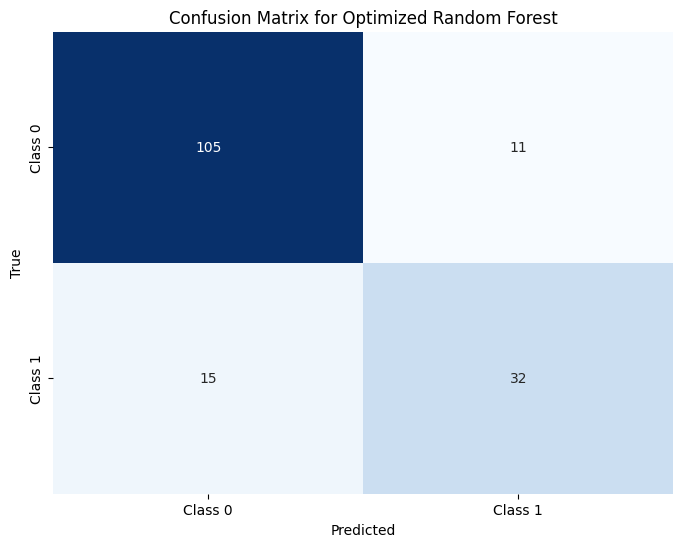

In [25]:
def format_row(row widths):
    return " | ".join(f"{item:{width}}" for item, width in zip(row, widths))

table_data = []
avg_accuracy = sum(accuracy['rf']) / len(accuracy['rf'])
avg_precision = sum(precision['rf']) / len(precision['rf'])
avg_recall = sum(recall['rf']) / len(recall['rf'])
avg_fscore = sum(fscore['rf']) / len(fscore['rf'])
avg_tnr = sum(TNR_dict['rf']) / len(TNR_dict['rf'])
table_data.append(['RandomForestClassifier', f"{avg_accuracy:.2f}", f"{avg_precision:.2f}", f"{avg_recall:.2f}", f"{avg_tnr:.2f}", f"{avg_fscore:.2f}"])

column_widths = [max(len(str(row[i])) for row in table_data) for i in range(len(table_data[0]))]
header = ["Classifier", "Accuracy", "Precision", "Recall", "Specificity", "F1 score"]
header_widths = [max(len(header[i]), column_widths[i]) for i in range(len(header))]

print(format_row(header, header_widths))
print("-" * sum(header_widths) + "-" * (len(header_widths) - 1))
for row in table_data:
    print(format_row(row, header_widths))

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot the confusion matrix for the final model on the test set
y_test_pred = rf_optimized.predict(X_test_strat)
plot_confusion_matrix(y_test_strat, y_test_pred, "Confusion Matrix for Optimized Random Forest")
